# **Haxby dataset**

In [1]:
pip install nilearn nibabel matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 47.2 MB/s eta 0:00:00


# **Loading haxby dataset**

In [2]:
from nilearn import datasets

haxby_dataset = datasets.fetch_haxby()


[fetch_haxby] Added README.md to /root/nilearn_data

[fetch_haxby] Dataset created in /root/nilearn_data/haxby2001

[fetch_haxby] Downloading data from https://www.nitrc.org/frs/download.php/7868/mask.nii.gz ...

[fetch_haxby]  ...done. (1 seconds, 0 min)

[fetch_haxby] Downloading data from http://data.pymvpa.org/datasets/haxby2001/MD5SUMS ...

[fetch_haxby]  ...done. (1 seconds, 0 min)

[fetch_haxby] Downloading data from http://data.pymvpa.org/datasets/haxby2001/subj2-2010.01.14.tar.gz ...

[fetch_haxby] Downloaded 786432 of 291168628 bytes (0.3%%,  7.1min remaining)

[fetch_haxby] Downloaded 13115392 of 291168628 bytes (4.5%%,   46.5s remaining)

[fetch_haxby] Downloaded 29704192 of 291168628 bytes (10.2%%,   28.1s remaining)

[fetch_haxby] Downloaded 45703168 of 291168628 bytes (15.7%%,   22.5s remaining)

[fetch_haxby] Downloaded 63610880 of 291168628 bytes (21.8%%,   19.0s remaining)

[fetch_haxby] Downloaded 80035840 of 291168628 bytes (27.5%%,   16.8s remaining)

[fetch_haxby] Downloaded 96935936 of 291168628 bytes (33.3%%,   14.8s remaining)

[fetch_haxby] Downloaded 114434048 of 291168628 bytes (39.3%%,   13.0s remaining)

[fetch_haxby] Downloaded 131588096 of 291168628 bytes (45.2%%,   11.5s remaining)

[fetch_haxby] Downloaded 148692992 of 291168628 bytes (51.1%%,   10.1s remaining)

[fetch_haxby] Downloaded 164601856 of 291168628 bytes (56.5%%,    8.9s remaining)

[fetch_haxby] Downloaded 180658176 of 291168628 bytes (62.0%%,    7.7s remaining)

[fetch_haxby] Downloaded 197656576 of 291168628 bytes (67.9%%,    6.4s remaining)

[fetch_haxby] Downloaded 215351296 of 291168628 bytes (74.0%%,    5.2s remaining)

[fetch_haxby] Downloaded 232120320 of 291168628 bytes (79.7%%,    4.0s remaining)

[fetch_haxby] Downloaded 249241600 of 291168628 bytes (85.6%%,    2.8s remaining)

[fetch_haxby] Downloaded 267370496 of 291168628 bytes (91.8%%,    1.6s remaining)

[fetch_haxby] Downloaded 284631040 of 291168628 bytes (97.8%%,    0.4s remaining)

[fetch_haxby]  ...done. (20 seconds, 0 min)

[fetch_haxby] Extracting data from 
/root/nilearn_data/haxby2001/9cabe068089e791ef0c5fe930fc20e30/subj2-2010.01.14.tar.gz...

[fetch_haxby] .. done.

# **Contents in Haxby**

In [3]:
print(haxby_dataset.keys())


dict_keys(['anat', 'func', 'session_target', 'mask_vt', 'mask_face', 'mask_house', 'mask_face_little', 'mask_house_little', 'mask', 'description', 't_r'])


In Nilearn, func is a list of functional runs. In the Haxby dataset we fetched, there is only one 4D fMRI run, so it is accessed as func[0]. That single file already contains the full time series of brain volumes

In [4]:
import nibabel as nib

fmri_img = nib.load(haxby_dataset.func[0])
fmri_data = fmri_img.get_fdata()

print("fMRI shape:", fmri_data.shape)


fMRI shape: (40, 64, 64, 1452)


nib.load(...)

Loads the 3D NIfTI image into memory

This is not yet numerical data, just the image object

🔹 get_fdata()

Converts the image into a NumPy array

Now we have actual voxel values

# **Load a VT mask and examine it**

In [5]:
mask_vt_img = nib.load(haxby_dataset.mask_vt[0])
mask_vt_data = mask_vt_img.get_fdata()

print("VT mask shape:", mask_vt_data.shape)
print("Unique mask values:", set(mask_vt_data.flatten()))


VT mask shape: (40, 64, 64)
Unique mask values: {np.float64(0.0), np.float64(1.0)}


A) VT mask shape: (40, 64, 64)

This means:

The mask is a 3D volume

Dimensions exactly match the spatial dimensions of the fMRI

B)Unique mask values

Across the entire brain volume, Its found only two  distinct values: 0 and 1

flatten() → converts the 3D mask into a 1D list of all voxel values

set(...) → keeps only distinct values

Value	Meaning
1.0	This voxel belongs to the Ventral Temporal (VT) cortex
0.0	This voxel is outside VT (ignore it)

# **Visualizations: Sanity + Mask Overlays**

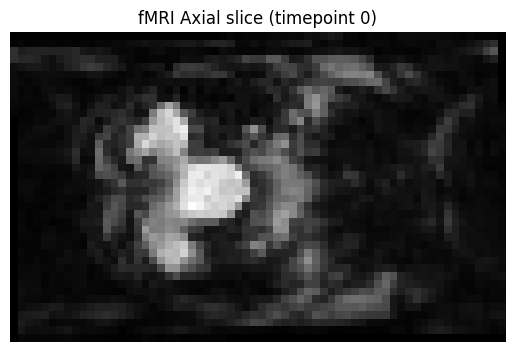

In [6]:
import matplotlib.pyplot as plt

# pick an axial slice index
slice_z = 20

plt.imshow(fmri_data[:, :, slice_z, 0], cmap='gray')
plt.title("fMRI Axial slice (timepoint 0)")
plt.axis('off')
plt.show()

Slice 20 is:

Just one cross-section of the brain

Chosen for visual sanity checking

In practice:

Lower Z → brain stem / cerebellum

Middle Z → ventricles, temporal regions

Higher Z → cortex

You usually scroll through slices to find regions of interest.

Each timepoint is still a full brain image

Anatomical structure is always visible

Activity appears as small intensity fluctuations

The fMRI data is 4D, with the third dimension representing axial slices along the Z-axis. By selecting slice_z = 20, we visualize one fixed brain slice. The fourth dimension represents time, so viewing the same slice at different timepoints shows subtle BOLD signal changes while the anatomy remains constant.

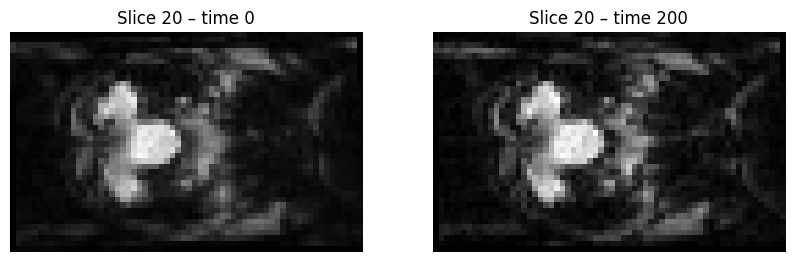

In [7]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(fmri_data[:, :, 20, 0], cmap='gray')
plt.title("Slice 20 – time 0")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(fmri_data[:, :, 20, 200], cmap='gray')
plt.title("Slice 20 – time 200")
plt.axis('off')

plt.show()


# **Visualization of VT mask over a random slice**

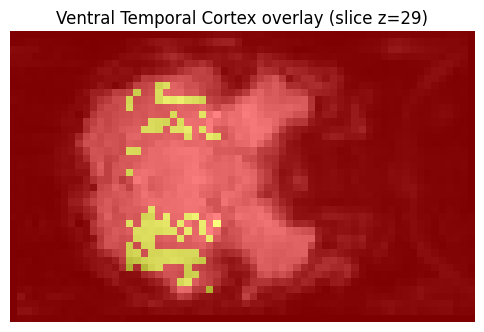

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
slice_z=29

# base fMRI slice
plt.imshow(fmri_data[:, :, slice_z, 0], cmap='gray')

# VT mask overlay
plt.imshow(mask_vt_data[:, :, slice_z],
           cmap='autumn',
           alpha=0.5)

plt.title(f"Ventral Temporal Cortex overlay (slice z={slice_z})")
plt.axis('off')
plt.show()


“By overlaying the VT binary mask on an axial fMRI slice, we can visually identify the Ventral Temporal Cortex as the colored region located in the ventral portion of the temporal lobes. These voxels are selectively retained for further analysis, while the rest of the brain is excluded.

✔ VT is localized

It occupies a small portion of the slice

Not whole-brain

✔ VT is bilateral

Appears on both left and right hemispheres

This matches known brain anatomy

✔ VT is ventral

Located in the lower part of the brain slice

Consistent with “ventral temporal” naming

All three are strong anatomical validations.



 The yellow region does NOT mean “high activation”

This is critical.

Yellow = mask selection

NOT neural activation

NOT stimulus response

It only means:

“These voxels are part of the Ventral Temporal Cortex.”

Activation comes later, when you:

Compare face vs house

Plot time-series

Compute contrasts

# **Visualize VT mask alone (binary view)**

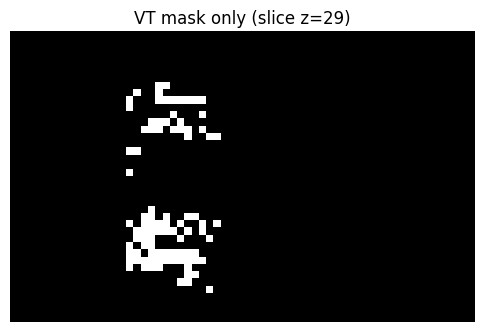

In [9]:
plt.figure(figsize=(6,6))

plt.imshow(
    mask_vt_data[:, :, slice_z],
    cmap='gray'
)

plt.title(f"VT mask only (slice z={slice_z})")
plt.axis('off')
plt.show()


White → voxels where mask == 1 (VT)

Black → voxels where mask == 0 (non-VT)

This is the pure anatomical definition of VT in that slice.

Pixelation = normal

✔ fMRI ≠ photograph

✔ Mask ≠ activation

✔ Mask = predefined anatomical regio

✔ Mask only tells where, not how active

# **Plot BOLD time-series of a VT voxel**

In [10]:
import numpy as np

# get coordinates of all VT voxels
vt_voxels = np.where(mask_vt_data == 1)

print("Number of VT voxels:", len(vt_voxels[0]))


Number of VT voxels: 464


Example output (will vary slightly):

Voxel 0: (x=18, y=42, z=29)

Voxel 1: (x=18, y=43, z=29)

Voxel 2: (x=19, y=41, z=29)

Voxel 3: (x=19, y=42, z=29)

In [11]:
x, y, z = vt_voxels[0][0], vt_voxels[1][0], vt_voxels[2][0]

print("Chosen VT voxel coordinate:", (x, y, z))


Chosen VT voxel coordinate: (np.int64(5), np.int64(17), np.int64(30))


Why this voxel?

It is simply the first VT voxel encountered in memory order

It is guaranteed to be inside the Ventral Temporal Cortex

It is not special or optimal

This voxel was chosen because:

“We just need one valid VT voxel to understand the BOLD signal concept.”

In [12]:
bold_ts = fmri_data[x, y, z, :]

In [13]:
print(bold_ts.shape)

(1452,)


# **Time seriesplot of a single voxel**

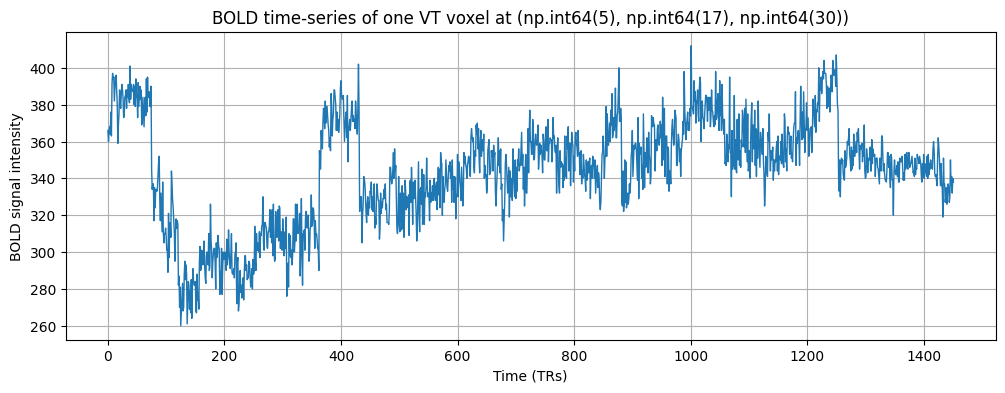

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(bold_ts, linewidth=1)

plt.xlabel("Time (TRs)")
plt.ylabel("BOLD signal intensity")
plt.title(f"BOLD time-series of one VT voxel at {x,y,z}")

plt.grid(True)
plt.show()


🔹 Y-axis: BOLD signal intensity

This is very important to interpret correctly.

What this value represents

Relative BOLD signal magnitude

Reflects:

Blood oxygenation

Blood flow changes

Indirect neural activity

What it is NOT

❌ Not voltage
❌ Not neuron firing rate
❌ Not absolute activi

We extracted the BOLD time-series of a single voxel within the Ventral Temporal Cortex by fixing its spatial coordinates and plotting its signal intensity across all time points. This illustrates how neural activity at a specific VT location fluctuates over the experiment duration

The voxel coordinate was selected by indexing the Ventral Temporal Cortex mask and choosing one valid voxel location. The x-axis represents time in repetition units (TRs), corresponding to successive fMRI volumes, while the y-axis shows the relative BOLD signal intensity of that voxel across the experiment.

# **Labels in haxby**

In [15]:
import pandas as pd

labels_df = pd.read_csv(haxby_dataset.session_target[0], sep=" ")
print(labels_df.head(30))
print(labels_df.tail(20))


      labels  chunks
0       rest       0
1       rest       0
2       rest       0
3       rest       0
4       rest       0
5       rest       0
6   scissors       0
7   scissors       0
8   scissors       0
9   scissors       0
10  scissors       0
11  scissors       0
12  scissors       0
13  scissors       0
14  scissors       0
15      rest       0
16      rest       0
17      rest       0
18      rest       0
19      rest       0
20      rest       0
21      face       0
22      face       0
23      face       0
24      face       0
25      face       0
26      face       0
27      face       0
28      face       0
29      face       0
        labels  chunks
1432      rest      11
1433      rest      11
1434      rest      11
1435      rest      11
1436      rest      11
1437  scissors      11
1438  scissors      11
1439  scissors      11
1440  scissors      11
1441  scissors      11
1442  scissors      11
1443  scissors      11
1444  scissors      11
1445  scissors      11
1446

# **sanity check**

In [16]:
print("Number of fMRI timepoints:", fmri_data.shape[-1])
print("Number of labels:", len(labels_df))


Number of fMRI timepoints: 1452
Number of labels: 1452


Although the Haxby dataset includes multiple object categories, faces and houses are commonly used for illustration because the ventral temporal cortex contains well-established face- and house-selective subregions. Other object categories also activate VT, but face and house contrasts provide the clearest and most interpretable responses

In [55]:
labels = labels_df['labels'].values

faces_mask  = labels == 'face'
houses_mask = labels == 'house'
rest_mask   = labels == 'rest'
scissors_mask   = labels == 'scissors'


# **Total no of face,house and rest labels each**

In [56]:
print("Faces TRs:", faces_mask.sum())
print("Houses TRs:", houses_mask.sum())
print("Rest TRs:", rest_mask.sum())
print("Scissors TRs:", scissors_mask.sum())


Faces TRs: 108
Houses TRs: 108
Rest TRs: 588
Scissors TRs: 108


# **ROI time series plot of a single voxel with labels**

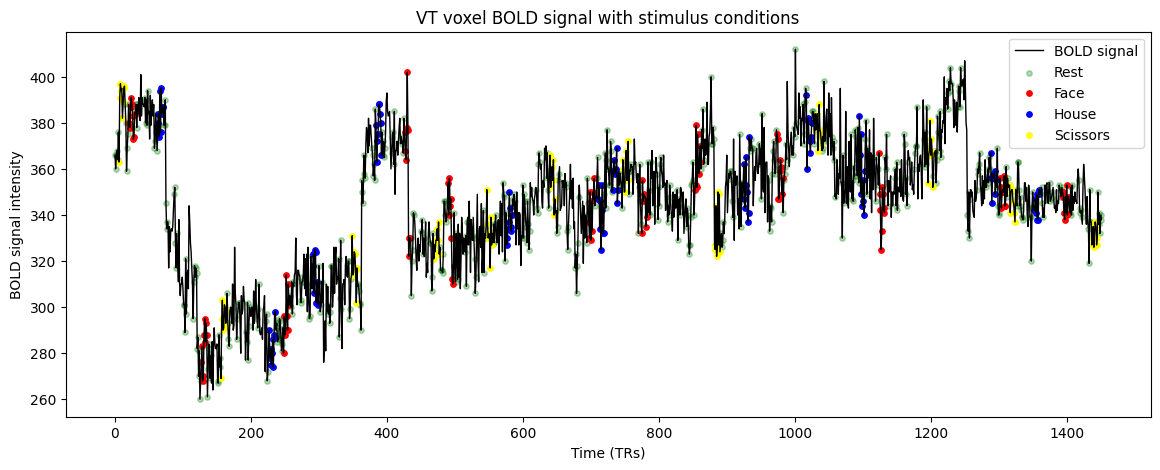

In [57]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14,5))

# plot full BOLD signal
plt.plot(bold_ts, color='black', linewidth=1, label='BOLD signal')

# overlay condition periods
plt.scatter(np.where(rest_mask)[0],
            bold_ts[rest_mask],
            color='green', s=15, alpha=0.3, label='Rest')

plt.scatter(np.where(faces_mask)[0],
            bold_ts[faces_mask],
            color='red', s=15, label='Face')

plt.scatter(np.where(houses_mask)[0],
            bold_ts[houses_mask],
            color='blue', s=15, label='House')

plt.scatter(np.where(scissors_mask)[0],
            bold_ts[scissors_mask],
            color='yellow', s=15, label='Scissors')
plt.xlabel("Time (TRs)")
plt.ylabel("BOLD signal intensity")
plt.title("VT voxel BOLD signal with stimulus conditions")
plt.legend()
plt.show()


# **Mosaic like visualization for  only the 8 ROI based slices with label for every time point**

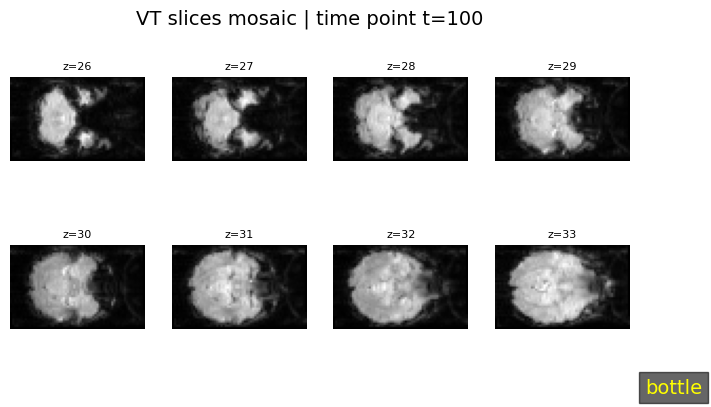

In [20]:
import matplotlib.pyplot as plt

# VT slice indices
vt_slices = list(range(26, 34))  # 26–33 (8 slices)

# choose a time point
t = 100  # you can change this
label = labels[t]

plt.figure(figsize=(8, 4))

for i, z in enumerate(vt_slices):
    plt.subplot(2, 4, i + 1)

    # extract VT slice at time t
    slice_img = fmri_data[:, :, z, t]

    plt.imshow(slice_img, cmap='gray')
    plt.axis('off')
    plt.title(f"z={z}", fontsize=8)

# put label on top-right corner of the whole figure
plt.text(
    0.99, 0.01, label,
    fontsize=14,
    color='yellow',
    ha='right',
    va='bottom',
    transform=plt.gcf().transFigure,
    bbox=dict(facecolor='black', alpha=0.6)
)

plt.suptitle(f"VT slices mosaic | time point t={t}", fontsize=14)
plt.show()


# **Mosaic like visualization for different time ponits**

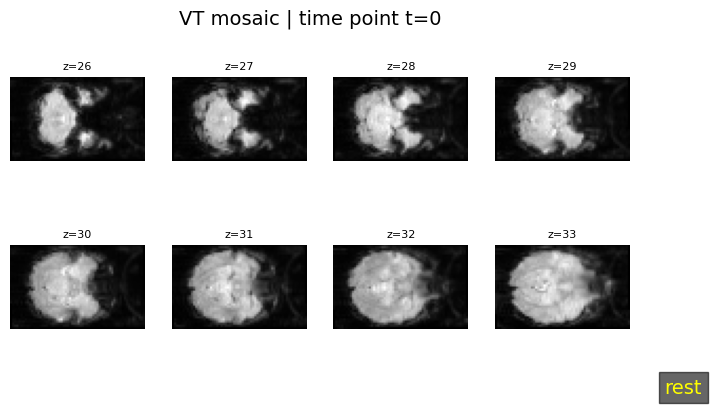

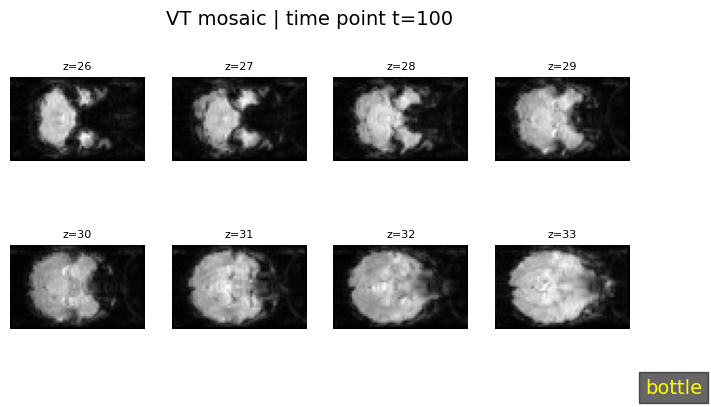

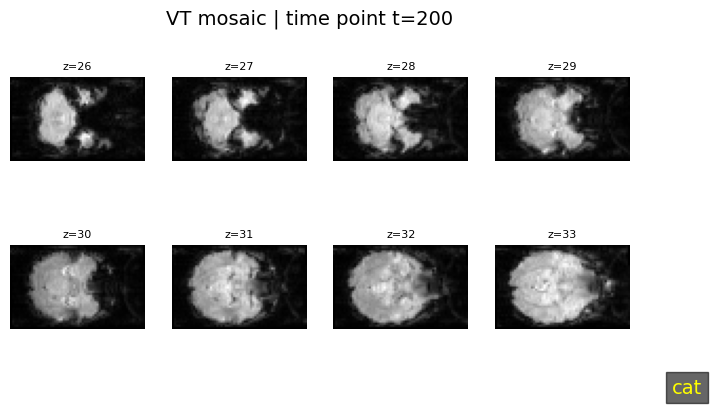

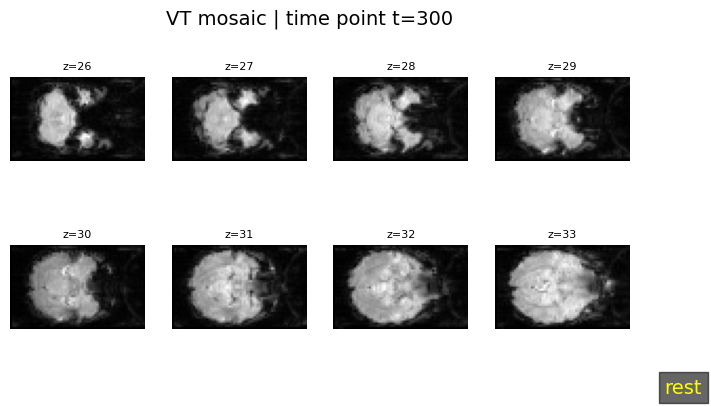

In [21]:
time_points = [0, 100, 200, 300]

for t in time_points:
    label = labels[t]

    plt.figure(figsize=(8, 4))
    for i, z in enumerate(vt_slices):
        plt.subplot(2, 4, i + 1)
        plt.imshow(fmri_data[:, :, z, t], cmap='gray')
        plt.axis('off')
        plt.title(f"z={z}", fontsize=8)

    plt.text(
        0.99, 0.01, label,
        fontsize=14,
        color='yellow',
        ha='right',
        va='bottom',
        transform=plt.gcf().transFigure,
        bbox=dict(facecolor='black', alpha=0.6)
    )

    plt.suptitle(f"VT mosaic | time point t={t}", fontsize=14)
    plt.show()



For each fMRI time point, I visualize all eight axial slices that contain the ventral temporal cortex as a mosaic. This represents the complete VT activity at that instant, and the corresponding stimulus label is overlaid on the image to verify correct temporal alignment



Blue → low BOLD signal

Green / Yellow → medium BOLD signal

Red → high BOLD signal

So each small image is showing relative BOLD intensity at that slice for the same time point.

This visualization does not show activation vs non-activation — it shows raw BOLD intensity distribution at a single time point.

# **Anatomical evidence for why 8 slices were chosen **

In [22]:
import numpy as np

# find z-slices that contain VT voxels
z_with_vt = np.where(mask_vt_data.sum(axis=(0,1)) > 0)[0]

print("Z slices containing VT:", z_with_vt[:10], "...", z_with_vt[-10:])


Z slices containing VT: [26 27 28 29 30 31 32 33] ... [26 27 28 29 30 31 32 33]


We identify the axial slices that contain the Ventral Temporal Cortex by summing the binary VT mask across spatial dimensions and finding Z indices where the sum is non-zero. This shows that VT is confined to slices 26–33, confirming its localized anatomical extent

Axis 0 → X (left–right)

Axis 1 → Y (front–back)

Axis 2 → Z (bottom–top / axial slices)

Each element is:

1 → voxel belongs to Ventral Temporal Cortex (VT)

0 → voxel outside VT

The Ventral Temporal Cortex mask was created by:

Neuroanatomical experts

Using:

Anatomical landmarks

Prior brain atlases

Functional localization studies

It was manually / semi-automatically defined and then aligned to the fMRI data

# **Colored visualization for BOLD activation**

In [23]:
import matplotlib.pyplot as plt

vt_slices = list(range(26, 34))  # 8 VT slices

def show_vt_mosaic(t):
    label = labels[t]

    fig, axes = plt.subplots(2, 4, figsize=(8, 4))
    axes = axes.flatten()

    for ax, z in zip(axes, vt_slices):
        ax.imshow(fmri_data[:, :, z, t], cmap='jet')
        ax.set_title(f"z={z}", fontsize=8)
        ax.axis('off')

    # remove all spacing
    plt.subplots_adjust(left=0, right=1, top=0.92, bottom=0.05,
                        wspace=0.01, hspace=0.01)

    # label on top-right
    fig.text(
        0.99, 0.01, label,
        fontsize=14,
        color='white',
        ha='right',
        va='bottom',
        bbox=dict(facecolor='black', alpha=0.6)
    )

    fig.suptitle(f"VT slices mosaic | time point t={t}", fontsize=14)
    plt.show()



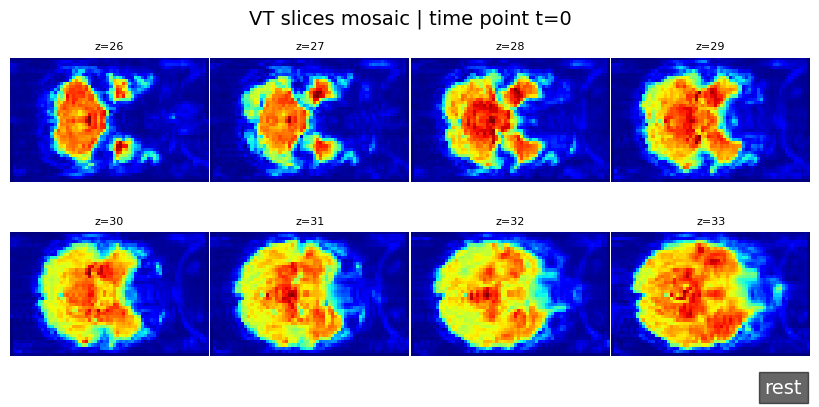

In [24]:
show_vt_mosaic(0)



In [25]:
import numpy as np
import matplotlib.pyplot as plt

vt_slices = list(range(26, 34))

def show_vt_mosaic_true_nogap(t):
    label = labels[t]

    # extract slices
    slices = [fmri_data[:, :, z, t] for z in vt_slices]

    # first row: z=26–29
    row1 = np.hstack(slices[0:4])

    # second row: z=30–33
    row2 = np.hstack(slices[4:8])

    # full mosaic
    mosaic = np.vstack([row1, row2])

    # plot as ONE image
    plt.figure(figsize=(10, 4))
    plt.imshow(mosaic, cmap='jet', interpolation='nearest')
    plt.axis('off')

    # label
    plt.text(
        mosaic.shape[1] - 10,
        mosaic.shape[0] - 10,
        label,
        color='white',
        fontsize=14,
        ha='right',
        va='bottom',
        bbox=dict(facecolor='black', alpha=0.6)
    )

    plt.title(f"VT slices mosaic | time point t={t}", fontsize=14)
    plt.show()


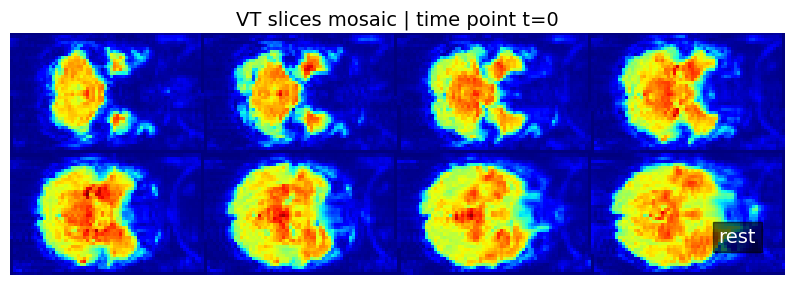

In [26]:
show_vt_mosaic_true_nogap(0)


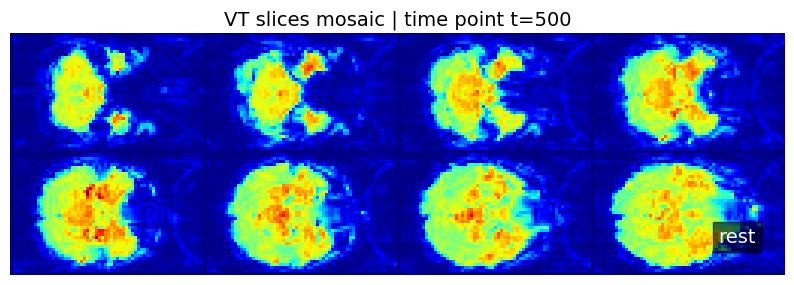

In [27]:
show_vt_mosaic_true_nogap(500)



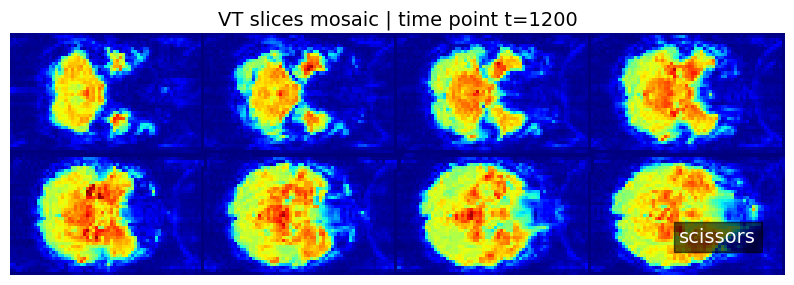

In [28]:
show_vt_mosaic_true_nogap(1200)

# **How is BOLD SIGNALS Acquired?**

The BOLD signal originates from the fMRI acquisition and is stored directly in the 4D functional image. I visualized its temporal evolution within the ventral temporal cortex. The colors represent relative signal intensity, not activation. The next step is to average signals across the ROI to obtain a representative time-series for quantitative and activation analysis.

# **ROI Level signal extraction: Averaging of VT Voxels**

In [29]:
# get VT voxel coordinates
xs, ys, zs = np.where(mask_vt_data == 1)

# number of time points
T = fmri_data.shape[-1]

# compute mean VT signal at each time point
vt_mean_signal = np.zeros(T)

for t in range(T):
    vt_mean_signal[t] = fmri_data[xs, ys, zs, t].mean()

print("VT mean signal shape:", vt_mean_signal.shape)


VT mean signal shape: (1452,)


VT_mean(t)= 1/N ∑Bold(t)
At each time point t:

Take all VT voxels

Extract their BOLD values

Compute the average


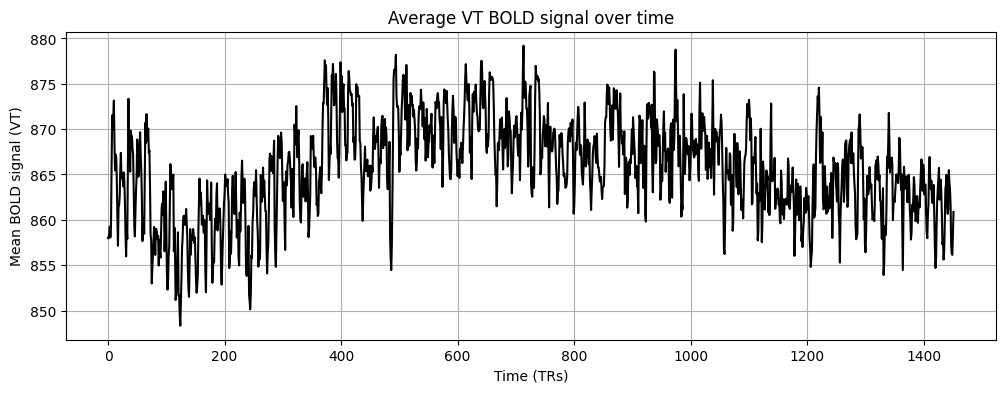

In [58]:
plt.figure(figsize=(12,4))
plt.plot(vt_mean_signal, color='black')
plt.xlabel("Time (TRs)")
plt.ylabel("Mean BOLD signal (VT)")
plt.title("Average VT BOLD signal over time")
plt.grid(True)
plt.show()


In [31]:
labels = labels_df['labels'].values

face_mask  = labels == 'face'
house_mask = labels == 'house'
rest_mask  = labels == 'rest'


# **ROI-level signal extraction with labels**

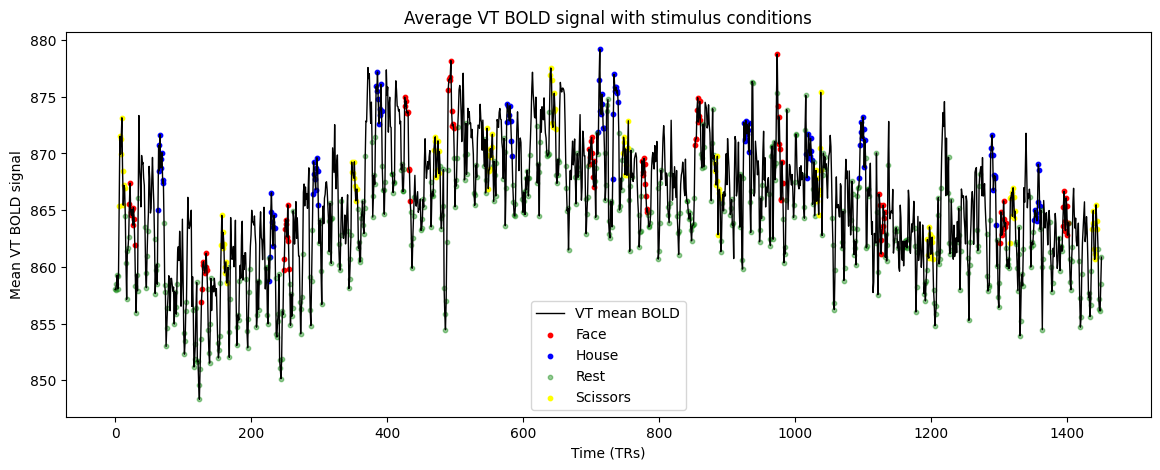

In [60]:
plt.figure(figsize=(14,5))

# base signal
plt.plot(vt_mean_signal, color='black', linewidth=1, label='VT mean BOLD')

# overlays
plt.scatter(np.where(face_mask)[0],
            vt_mean_signal[face_mask],
            color='red', s=10, label='Face')

plt.scatter(np.where(house_mask)[0],
            vt_mean_signal[house_mask],
            color='blue', s=10, label='House')

plt.scatter(np.where(rest_mask)[0],
            vt_mean_signal[rest_mask],
            color='green', s=10, alpha=0.4, label='Rest')
plt.scatter(np.where(scissors_mask)[0],
            vt_mean_signal[scissors_mask],
            color='yellow', s=10, label='Scissors')

plt.xlabel("Time (TRs)")
plt.ylabel("Mean VT BOLD signal")
plt.title("Average VT BOLD signal with stimulus conditions")
plt.legend()
plt.show()


Black line → average BOLD signal of the entire ventral temporal cortex at each time point

Colored dots → which stimulus was shown at that time

Red = Face

Blue = House

Green = Rest

This means you are no longer looking at a single voxel — you are looking at regional activity.

After averaging BOLD signals across all ventral temporal cortex voxels, I observed that task conditions such as faces and houses show slightly higher mean responses compared to rest. This indicates task-related activation in VT, consistent with its role in visual object processing

Here By Considering either face or house as motor task ,comparison anaylsis  can be done by comparing motor vs Rest

# **Visualization for every timepoint with label**

In [33]:
from ipywidgets import interact, IntSlider


In [34]:
interact(
    show_vt_mosaic_true_nogap,
    t=IntSlider(
        min=0,
        max=fmri_data.shape[-1] - 1,
        step=1,
        value=0,
        description='Time point'
    )
)


interactive(children=(IntSlider(value=0, description='Time point', max=1451), Output()), _dom_classes=('widget…

<function __main__.show_vt_mosaic_true_nogap(t)>

y averaging across VT voxels, the signal becomes smoother and more interpretable, and we can observe condition-dependent modulation.

# Motor vs Rest analysis without z scoring

In [61]:
vt_face_mean  = vt_mean_signal[face_mask].mean()
vt_house_mean = vt_mean_signal[house_mask].mean()
vt_rest_mean  = vt_mean_signal[rest_mask].mean()
vt_scissors_mean  = vt_mean_signal[scissors_mask].mean()
print("VT mean BOLD:")
print("Face :", vt_face_mean)
print("House:", vt_house_mean)
print("Rest :", vt_rest_mean)
print("scissors:",vt_scissors_mean)


VT mean BOLD:
Face : 867.2170737547893
House: 870.2923451468711
Rest : 862.8784893267652
scissors: 867.3404773307791


VT face mean = average VT signal during face blocks

VT house mean = average VT signal during house blocks

VT rest mean = baseline VT signal

📌 This is the FIRST valid form of “activation analysis”

You can say:

“Activation is inferred by comparing the average regional signal during task conditions against rest.”

oth task conditions > rest

House > Face > Rest


Differences are small but consistent

This is normal in fMRI

BOLD changes are subtle (1–3%)

House has the highest response

Expected in VT (object-related processing)he ventral temporal cortex shows higher average BOLD response during visual object tasks compared to rest.

# PROOF 2 for why 8 slices wre chosen: Signal dilution experiment

In [36]:
xs_all, ys_all, zs_all = np.where(np.ones_like(mask_vt_data))

whole_brain_mean = np.zeros(T)
for t in range(T):
    whole_brain_mean[t] = fmri_data[xs_all, ys_all, zs_all, t].mean()


In [37]:
vt_task_rest_diff = vt_face_mean - vt_rest_mean
wb_task_rest_diff = whole_brain_mean[face_mask].mean() - whole_brain_mean[rest_mask].mean()

print("VT task-rest difference:", vt_task_rest_diff)
print("Whole-brain task-rest difference:", wb_task_rest_diff)


VT task-rest difference: 4.338584428024092
Whole-brain task-rest difference: 0.016751277401738207


I restricted the analysis to slices 26–33 because the VT mask shows that the ventral temporal cortex exists only in those slices. Including all slices would introduce anatomically irrelevant regions. I also verified that task–rest differences are stronger when averaging only VT voxels compared to whole-brain averaging, which demonstrates reduced signal dilution.

When a task (face/house) is shown, the average BOLD signal in VT increases by about 4.3 units compared to rest

When you average the BOLD signal across the entire brain, the task-related change is almost zero.

Task-related signal is localized, not global.

The task affects only specific regions (like VT)

Most of the brain is not involved in this task

When you average everything together, the meaningful signal gets washed out

This is called signal dilution.

The large task–rest difference in VT compared to the near-zero whole-brain difference shows that task-related BOLD responses are localized, and averaging across all slices dilutes the signal. This quantitatively justifies using only VT slices

Haxby et al. (2001):he Haxby (2001) study restricted analysis to the ventral temporal cortex and did multivariate decoding based on patterns of activity in that ROI
Etzel et al. (2009) wrote an accessible introduction showing how ROI-based classification (like in MVPA) is done. They talk about how using groups of voxels within a specific region (not whole brain) improves detection of patterns and task information

# **Visualization for Motor (Face) vs Rest image**

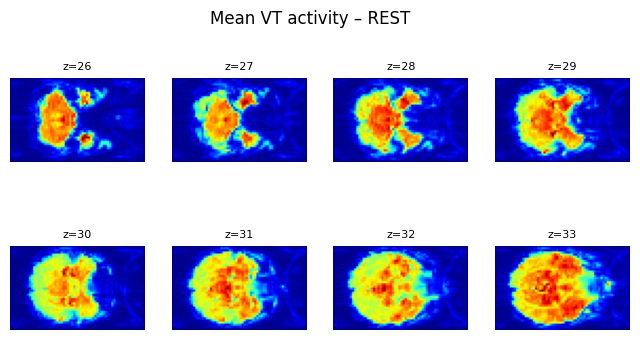

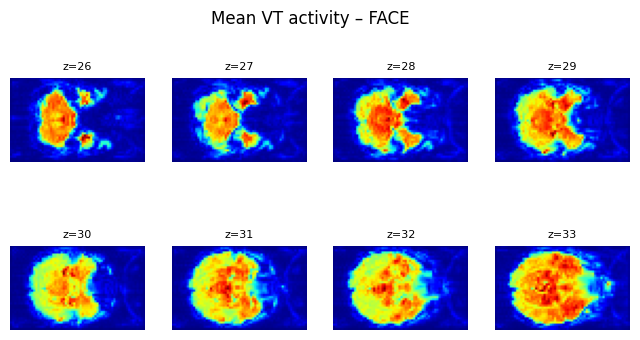

In [38]:
# get time indices
face_ts = np.where(face_mask)[0]
rest_ts = np.where(rest_mask)[0]

vt_slices = list(range(26, 34))

def mean_mosaic(time_indices, title):
    plt.figure(figsize=(8,4))
    for i, z in enumerate(vt_slices):
        plt.subplot(2,4,i+1)
        img = fmri_data[:, :, z, time_indices].mean(axis=-1)
        plt.imshow(img, cmap='jet')
        plt.axis('off')
        plt.title(f"z={z}", fontsize=8)
    plt.suptitle(title)
    plt.show()

mean_mosaic(rest_ts, "Mean VT activity – REST")
mean_mosaic(face_ts, "Mean VT activity – FACE")


# **Activation Differncce visualization**

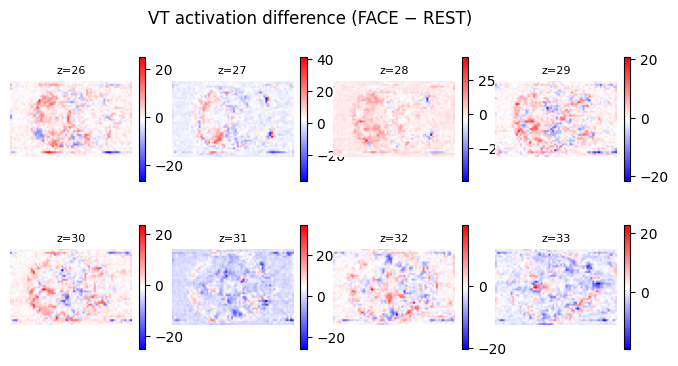

In [39]:
def diff_mosaic():
    plt.figure(figsize=(8,4))
    for i, z in enumerate(vt_slices):
        plt.subplot(2,4,i+1)
        face_img = fmri_data[:, :, z, face_ts].mean(axis=-1)
        rest_img = fmri_data[:, :, z, rest_ts].mean(axis=-1)
        diff = face_img - rest_img
        plt.imshow(diff, cmap='bwr')
        plt.colorbar(fraction=0.046)
        plt.axis('off')
        plt.title(f"z={z}", fontsize=8)
    plt.suptitle("VT activation difference (FACE − REST)")
    plt.show()

diff_mosaic()


This difference map highlights task-related activation by directly subtracting baseline activity. Regions with positive values indicate increased BOLD response during face perception compared to rest

# **Multiple visualization using Toggle to view Face,rest,diffrence**

In [40]:
vt_slices = list(range(26, 34))

face_ts = np.where(face_mask)[0]
rest_ts = np.where(rest_mask)[0]

mean_face_imgs = {}
mean_rest_imgs = {}
diff_imgs = {}


for z in vt_slices:
    mean_face_imgs[z] = fmri_data[:, :, z, face_ts].mean(axis=-1)
    mean_rest_imgs[z] = fmri_data[:, :, z, rest_ts].mean(axis=-1)
    diff_imgs[z] = mean_face_imgs[z] - mean_rest_imgs[z]


In [41]:
def show_vt_condition(condition='REST'):
    plt.figure(figsize=(8,4))

    for i, z in enumerate(vt_slices):
        plt.subplot(2,4,i+1)

        if condition == 'REST':
            img = mean_rest_imgs[z]
            cmap = 'jet'
        elif condition == 'FACE':
            img = mean_face_imgs[z]
            cmap = 'jet'
        else:  # DIFFERENCE
            img = diff_imgs[z]
            cmap = 'bwr'

        plt.imshow(img, cmap=cmap)
        plt.axis('off')
        plt.title(f"z={z}", fontsize=8)

    plt.suptitle(f"VT visualization – {condition}", fontsize=14)
    plt.show()


In [42]:
from ipywidgets import interact, Dropdown

interact(
    show_vt_condition,
    condition=Dropdown(
        options=['REST', 'FACE', 'DIFFERENCE'],
        value='REST',
        description='Condition'
    )
)


interactive(children=(Dropdown(description='Condition', options=('REST', 'FACE', 'DIFFERENCE'), value='REST'),…

<function __main__.show_vt_condition(condition='REST')>

# **GLM**

Glm is used to smoothen data rmove noise after avergaing,commonly used method

In [43]:
import pandas as pd
import numpy as np
from nilearn.glm.first_level import make_first_level_design_matrix

TR = 2.5  # seconds
n_scans = fmri_data.shape[-1]
frame_times = np.arange(n_scans) * TR

events = []

for i, lbl in enumerate(labels):
    if lbl in ['face', 'rest']:
        events.append({
            'onset': i * TR,
            'duration': TR,
            'trial_type': lbl
        })

events_df = pd.DataFrame(events)


In [44]:
design_matrix = make_first_level_design_matrix(
    frame_times,
    events_df,
    hrf_model='spm',
    drift_model='cosine'
)



In [45]:
import nibabel as nib
from nilearn.glm.first_level import FirstLevelModel

fmri_img = nib.load(haxby_dataset.func[0])
vt_mask_img = nib.load(haxby_dataset.mask_vt[0])

glm = FirstLevelModel(
    t_r=TR,
    mask_img=vt_mask_img,
    hrf_model='spm',
    noise_model='ar1',
    standardize=True
)

glm = glm.fit(fmri_img, design_matrices=design_matrix)



/tmp/ipython-input-489477617.py:15: UserWarning: If design matrices are supplied, [hrf_model, t_r] will be ignored.
  glm = glm.fit(fmri_img, design_matrices=design_matrix)


In [46]:
from nilearn import plotting
contrast = 'face - rest'
z_map = glm.compute_contrast(contrast, output_type='z_score')




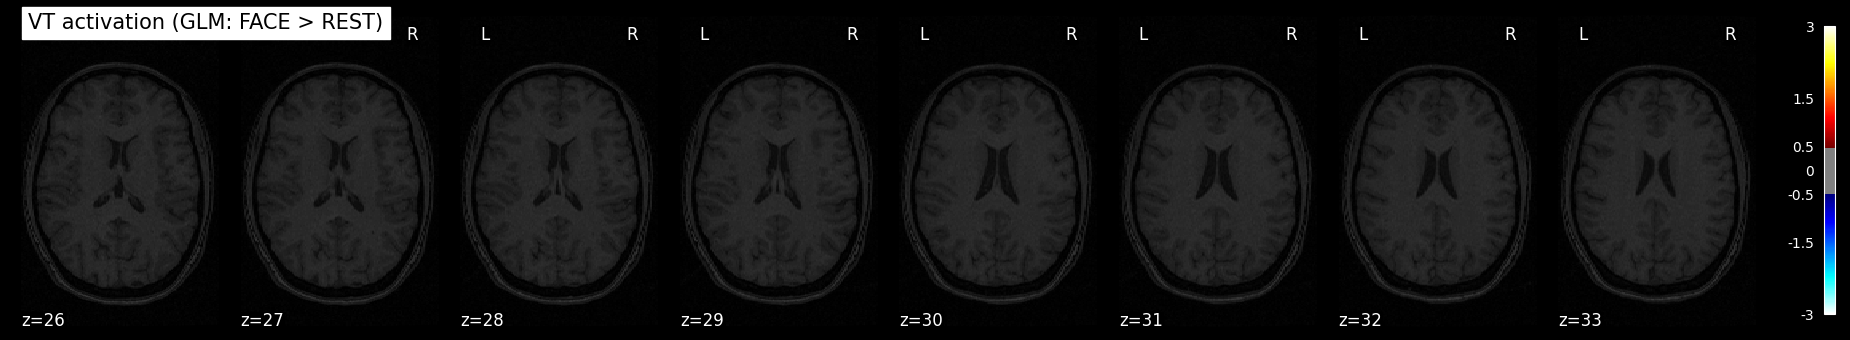

In [47]:
from nilearn import plotting
import nibabel as nib

anat_img = nib.load(haxby_dataset.anat[0])  # anatomical background

plotting.plot_stat_map(
    z_map,
    bg_img=anat_img,              # IMPORTANT: bring brain back
    display_mode='z',
    cut_coords=[26,27,28,29,30,31,32,33],
    threshold=0.5,                # low threshold
    vmin=-3, vmax=3,              # clamp range
    cmap='cold_hot',
    colorbar=True,
    title='VT activation (GLM: FACE > REST)'
)






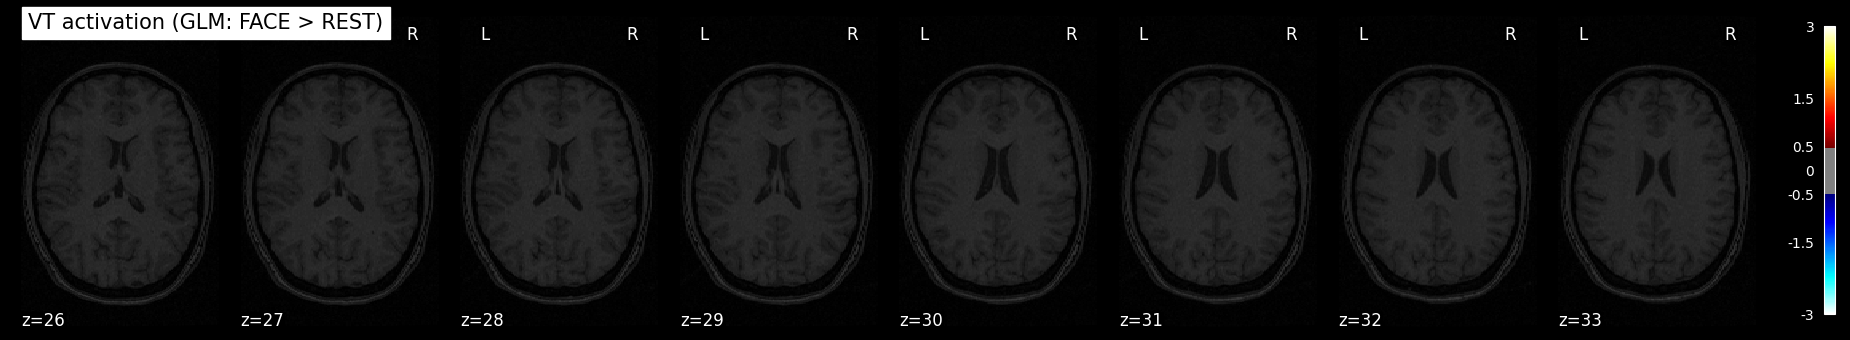

In [48]:
from nilearn import plotting
import nibabel as nib

anat_img = nib.load(haxby_dataset.anat[0])  # anatomical background

plotting.plot_stat_map(
    z_map,
    bg_img=anat_img,              # IMPORTANT: bring brain back
    display_mode='z',
    cut_coords=[26,27,28,29,30,31,32,33],
    threshold=0.5,                # low threshold
    vmin=-3, vmax=3,              # clamp range
    cmap='cold_hot',
    colorbar=True,
    title='VT activation (GLM: FACE > REST)'
)


Glass Brain visualization

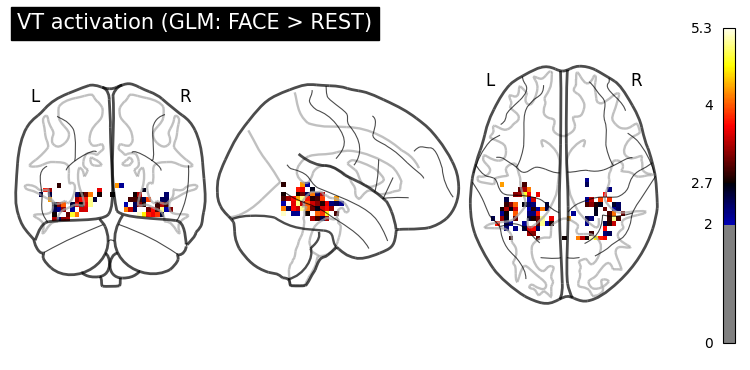

In [49]:
from nilearn import plotting

plotting.plot_glass_brain(
    z_map,
    threshold=2.0,
    colorbar=True,
    cmap='cold_hot',
    title='VT activation (GLM: FACE > REST)'
)


Red = FACE > REST

Blue = REST > FACE

Projection makes small clusters visible

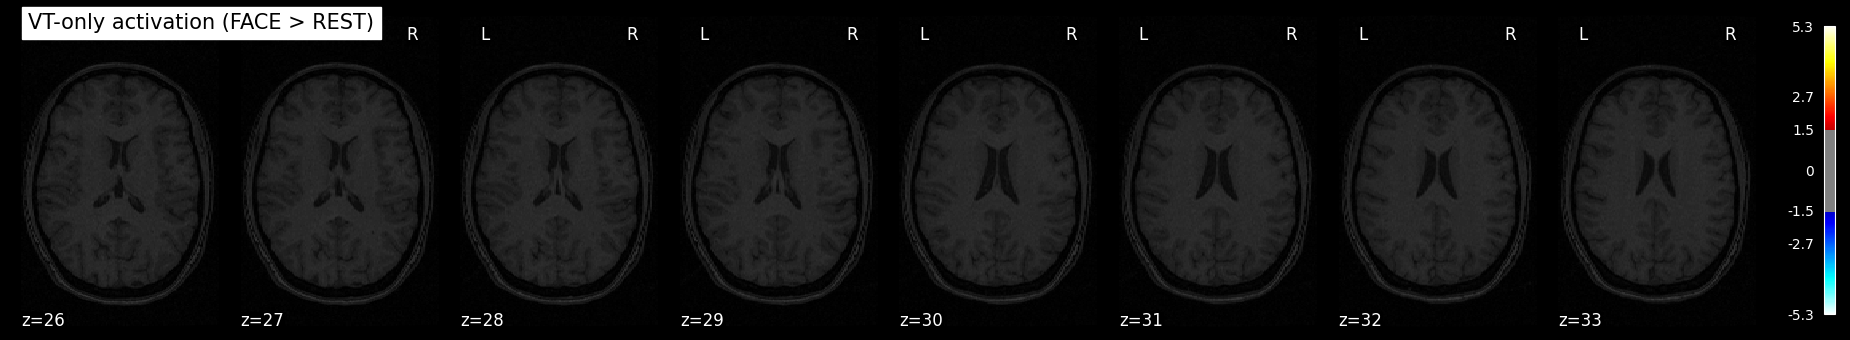

In [50]:
import numpy as np
import nibabel as nib

z_data = z_map.get_fdata()
vt_masked_z = np.zeros_like(z_data)
vt_masked_z[mask_vt_data == 1] = z_data[mask_vt_data == 1]

vt_z_map = nib.Nifti1Image(vt_masked_z, z_map.affine)
plotting.plot_stat_map(
    vt_z_map,
    bg_img=anat_img,
    display_mode='z',
    cut_coords=[26,27,28,29,30,31,32,33],
    threshold=1.5,
    cmap='cold_hot',
    colorbar=True,
    title='VT-only activation (FACE > REST)'
)



# **GLM predicted VT activity**

In [51]:
from nilearn.glm.first_level import FirstLevelModel
import nibabel as nib

glm = FirstLevelModel(
    t_r=TR,
    mask_img=vt_mask_img,
    hrf_model='spm',
    noise_model='ar1',
    standardize=True,
    minimize_memory=False   # 🔑 THIS FIXES THE ERROR
)

glm = glm.fit(fmri_img, design_matrices=design_matrix)



/tmp/ipython-input-1674326101.py:13: UserWarning: If design matrices are supplied, [hrf_model, t_r] will be ignored.
  glm = glm.fit(fmri_img, design_matrices=design_matrix)


In [52]:
# Get predicted fMRI image from GLM
predicted_img = glm.predicted[0]
predicted_data = predicted_img.get_fdata()



In [53]:
import numpy as np

xs, ys, zs = np.where(mask_vt_data == 1)

T = predicted_data.shape[-1]
glm_predicted_signal = np.zeros(T)

for t in range(T):
    glm_predicted_signal[t] = predicted_data[xs, ys, zs, t].mean()


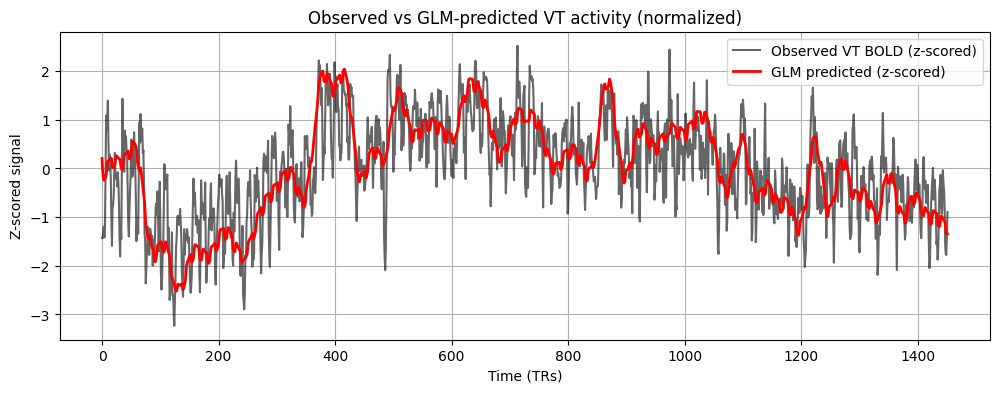

In [54]:
from scipy.stats import zscore
import matplotlib.pyplot as plt

obs_z = zscore(vt_mean_signal)
pred_z = zscore(glm_predicted_signal)

plt.figure(figsize=(12,4))
plt.plot(obs_z, label='Observed VT BOLD (z-scored)', color='black', alpha=0.6)
plt.plot(pred_z, label='GLM predicted (z-scored)', color='red', linewidth=2)

plt.xlabel("Time (TRs)")
plt.ylabel("Z-scored signal")
plt.title("Observed vs GLM-predicted VT activity (normalized)")
plt.legend()
plt.grid(True)
plt.show()


The next step would be to statistically test these differences or extract these regional signals as features